In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [7]:
df = pd.read_csv('../data/star_classification_10_cartesian.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,class,redshift,x,y
0,1.237663e+18,15.342907,0.794882,18.74547,17.49025,16.89122,16.57350,0.713781,GALAXY,0.042002,-0.654218,0.250033
1,1.237664e+18,120.365538,55.660432,19.99985,19.68133,19.50156,19.17364,-0.775960,QSO,1.633797,0.348727,0.525619
2,1.237655e+18,245.610038,42.974786,23.11792,20.81292,18.88351,18.12335,-0.845505,GALAXY,0.454852,0.450750,0.286260
3,1.237660e+18,127.957356,6.647703,21.94454,21.01012,20.93496,20.93184,0.356499,QSO,2.608515,-0.618062,0.700648
4,1.237665e+18,159.174526,35.881846,18.89945,17.68422,17.02925,16.60000,-0.969780,GALAXY,0.083804,0.122096,-0.211234


In [8]:
alpha = df['alpha']
delta = df['delta']
redshift = df['redshift']
x = df['x']
y = df['y']
z = df['z']

light_cols = ['u', 'g', 'r', 'i', 'redshift']
colors = ['magma', 'viridis', 'hot', 'hot', 'inferno']

In [9]:
def plot_doido(criterion, color):
    # Plot em 3D com cores baseadas no redshift
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(x, y, z, c=criterion, cmap=color, marker='.')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Conversão de Coordenadas Esféricas para Coordenadas Cartesianas com Cor Baseada em {criterion.name}')
    fig.colorbar(sc, label=criterion.name)
    plt.show()

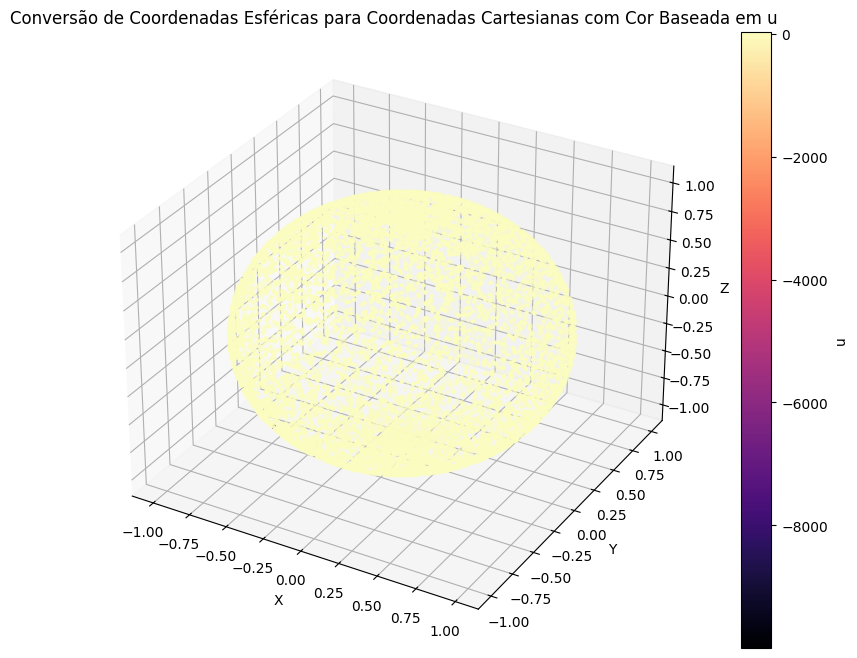

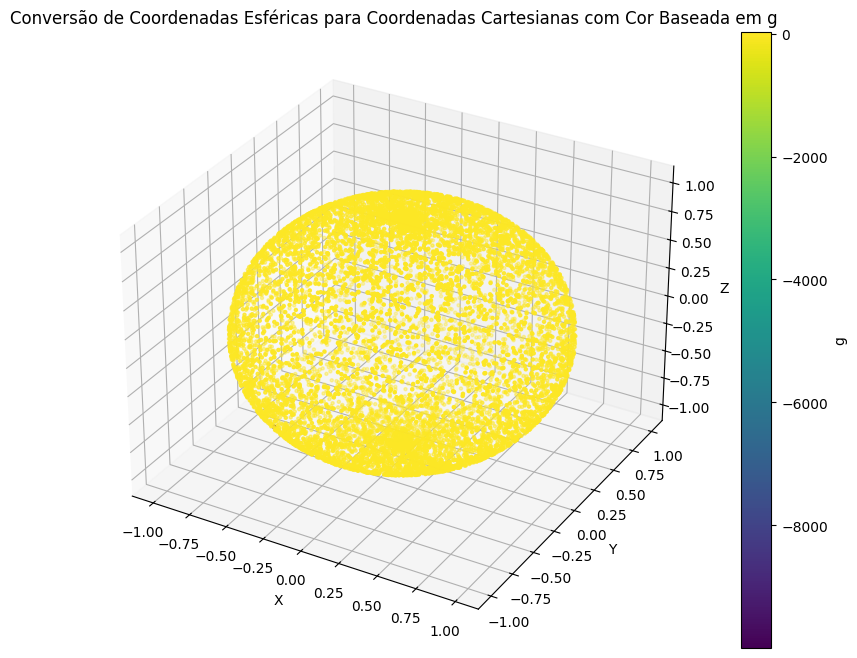

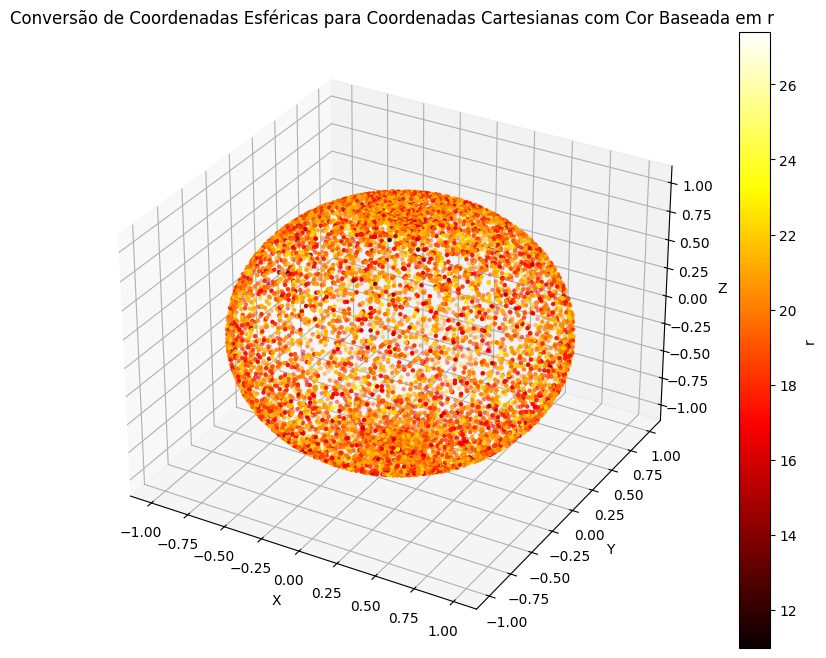

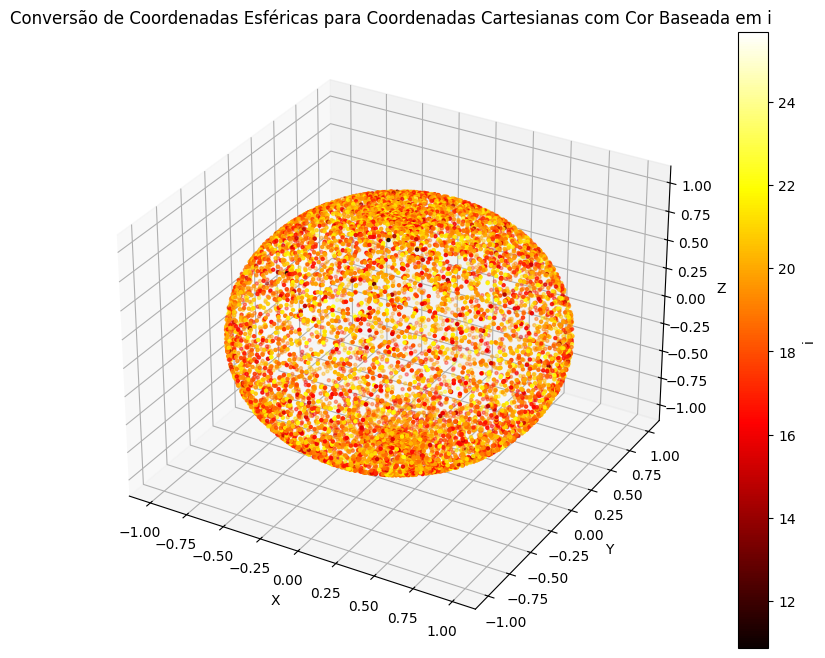

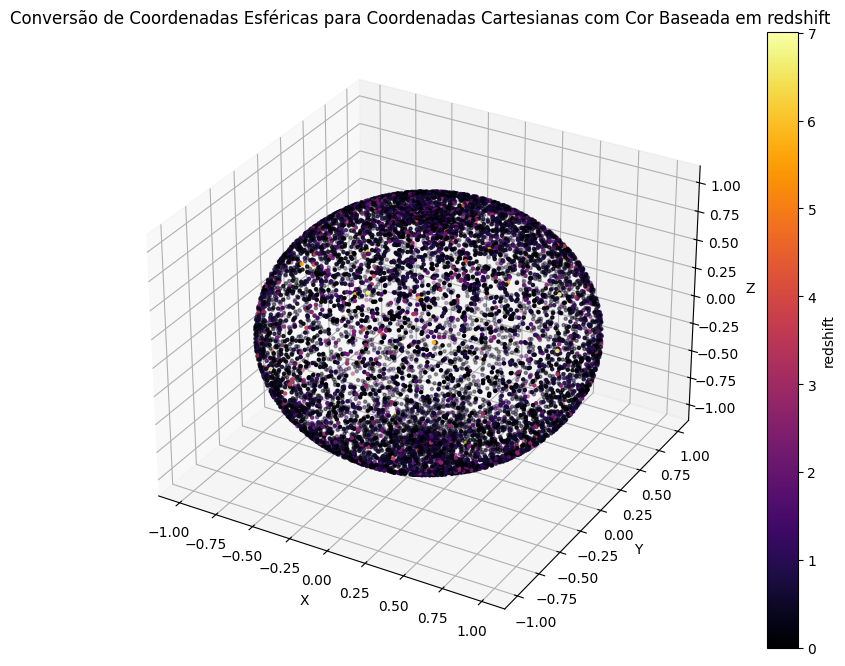

In [10]:
for c1, c2 in zip(light_cols, colors):
    plot_doido(df[c1], c2)